# Análisis de la base de datos sobre Proyectos Finalizados

In [163]:
import pandas as pd

proyectos = pd.read_excel("data/ProyectosFinalizados.xlsx", sheet_name="base")

proyectos.head()

,IDProyecto,Empresa,Peticion,Peticion.1,pet+empresa,Nombre,Cfp,Eficiencia,PDR,EsfuerzoTotalP,...,PDR S,PDR M1,PDR M2,PDR L,Lead Time,F1GestiondelaDemanda,F2Elicitacion,F3Contruccion,F4Final,Tamaño
0,1,México,8318.0,8318,8318México,Modificación a la utileria de generación de pa...,12,NaN,33.708333,404.5,...,NaN,NaN,NaN,NaN,914.0,825.0,8.0,42.0,35.0,10-29
1,2,México,9619.0,9619,9619México,Modificacion al programa Vbncarga.exe,2,NaN,147.500000,295.0,...,NaN,NaN,NaN,NaN,609.0,584.0,7.0,14.0,1.0,2-9
2,3,México,10438.0,10438,10438México,Permisos para Cambios de puntos de Sembrado- P...,11,NaN,51.375455,1019.0,...,NaN,NaN,NaN,NaN,519.0,461.0,2.0,37.0,1.0,10-29
3,4,México,10522.0,10522,10522México,Corrección del informe TabuladoCredito,11,NaN,47.727273,525.0,...,NaN,NaN,NaN,NaN,493.0,455.0,9.0,27.0,1.0,10-29
4,5,México,10528.0,10528,10528México,Corrección al Tabulado de Carteras y Hojas men...,4,NaN,26.290000,213.0,...,NaN,NaN,NaN,NaN,557.0,520.0,5.0,30.0,0.0,2-9


In [164]:
def limpiar_columna(columna):
    # 1. Reemplazar caracteres especiales
    columna = columna.replace(" ", "_") \
        .replace("á", "a") \
        .replace("é", "e") \
        .replace("í", "i") \
        .replace("ó", "o") \
        .replace("ú", "u") \
        .replace("ñ", "n") \
        .replace("+", "_") \
        .replace(".", "_") \
        .replace("(", "_") \
        .replace(")", "")
    import re
    # 2. Poner un guion bajo entre cambio de letras de minúscula a mayúsculas
    columna = re.sub("([a-z])([A-Z])", "\\1_\\2", columna)
    # 3. Poner un guion bajo entre ID y letra
    columna = re.sub("ID([A-Za-z])", "ID_\\1", columna)
    # 4. Poner un guion bajo entre número y letra
    columna = re.sub("([0-9])([A-Za-z])", "\\1_\\2", columna)
    # 4. Poner un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])([0-9])", "\\1_\\2", columna)
    # 5. Quitar un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])_([0-9])", "\\1\\2", columna)
    # 6. Poner un guion bajo entre letra y número final
    columna = re.sub("([A-Za-z])([0-9])$", "\\1_\\2", columna)
    # 7. Convertir a mayúsculas
    columna = columna.upper()
    return columna

proyectos.columns = map(limpiar_columna, proyectos.columns.values)

proyectos.head()

,ID_PROYECTO,EMPRESA,PETICION,PETICION_1,PET_EMPRESA,NOMBRE,CFP,EFICIENCIA,PDR,ESFUERZO_TOTAL_P,...,PDR_S,PDR_M_1,PDR_M_2,PDR_L,LEAD_TIME,F1_GESTIONDELA_DEMANDA,F2_ELICITACION,F3_CONTRUCCION,F4_FINAL,TAMANO
0,1,México,8318.0,8318,8318México,Modificación a la utileria de generación de pa...,12,NaN,33.708333,404.5,...,NaN,NaN,NaN,NaN,914.0,825.0,8.0,42.0,35.0,10-29
1,2,México,9619.0,9619,9619México,Modificacion al programa Vbncarga.exe,2,NaN,147.500000,295.0,...,NaN,NaN,NaN,NaN,609.0,584.0,7.0,14.0,1.0,2-9
2,3,México,10438.0,10438,10438México,Permisos para Cambios de puntos de Sembrado- P...,11,NaN,51.375455,1019.0,...,NaN,NaN,NaN,NaN,519.0,461.0,2.0,37.0,1.0,10-29
3,4,México,10522.0,10522,10522México,Corrección del informe TabuladoCredito,11,NaN,47.727273,525.0,...,NaN,NaN,NaN,NaN,493.0,455.0,9.0,27.0,1.0,10-29
4,5,México,10528.0,10528,10528México,Corrección al Tabulado de Carteras y Hojas men...,4,NaN,26.290000,213.0,...,NaN,NaN,NaN,NaN,557.0,520.0,5.0,30.0,0.0,2-9


In [165]:
proyectos.columns.values

array(['ID_PROYECTO', 'EMPRESA', 'PETICION', 'PETICION_1', 'PET_EMPRESA',
       'NOMBRE', 'CFP', 'EFICIENCIA', 'PDR', 'ESFUERZO_TOTAL_P',
       'ESFUERZO_TOTAL_R', 'ESFUERZO_TOTAL_E', 'ESFUERZO_TOTAL_V',
       'ESF_PLANEACION_P', 'ESF_PLANEACION_R', 'ESF_PLANEACION_V',
       'ESF_ELICITACION_P', 'ESF_ELICITACION_R', 'ESF_ELICITACION_E',
       'ESF_ELICITACION_V', 'ESF_DOCUMENTACION_P', 'ESF_DOCUMENTACION_R',
       'ESF_DOCUMENTACION_E', 'ESF_DOCUMENTACION_V', 'ESF_ARQUITECTURA_P',
       'ESF_ARQUITECTURA_R', 'ESF_ARQUITECTURA_E', 'ESF_ARQUITECTURA_V',
       'ESF_CODIFICACION_P', 'ESF_CODIFICACION_R', 'ESF_CODIFICACION_E',
       'ESF_CODIFICACION_V', 'ESF_PRUEBAS_P', 'ESF_PRUEBAS_R',
       'ESF_PRUEBAS_E', 'ESF_PRUEBAS_V', 'ESF_IMPLEMENTACION_P',
       'ESF_IMPLEMENTACION_R', 'ESF_IMPLEMENTACION_V', 'ESF_OTROS_P',
       'ESF_OTROS_R', 'ESF_OTROS_V', 'ARQUITECTURA_I', 'LENGUAJE_I',
       'BDI', 'FRAMEWORK_I', 'ARQUITECTURA_V', 'LENGUAJE_V', 'BDV',
       'FRAMEWORK_V', 'EST_

In [166]:
# Ejes de análisis:

# [Apriori] ID_PROYECTO - ID + NUM
# [Apriori] EMPRESA - CAT + TEXTO
# [Apriori] PETICION - CAT + NUM .. VERSION
# [Apriori] PETICION_1 - CAT + NUM
# [Apriori] PET_EMPRESA - NUM -- CAT + TEXTO
# [Apriori] NOMBRE - TEXTO
# [Apriori >>>] CFP - NUM
# [Posteriori] EFICIENCIA - DEC
# [Agregable] PDR - DEC + TASA + HORAS (-> CFP)
# [Apriori + Posteriori] ESFUERZO_TOTAL_P, ESFUERZO_TOTAL_R, ESFUERZO_TOTAL_E, ESFUERZO_TOTAL_V - DEC
# [Apriori + Posteriori] ESF_PLANEACION_P, ESF_PLANEACION_R, ESF_PLANEACION_V - CONTINUO
# [Apriori + Posteriori] ESF_ELICITACION_P, ESF_ELICITACION_R, ESF_ELICITACION_E, ESF_ELICITACION_V - DEC
# [Apriori + Posteriori] ESF_DOCUMENTACION_P, ESF_DOCUMENTACION_R, ESF_DOCUMENTACION_E, ESF_DOCUMENTACION_V - DEC
# [Apriori + Posteriori] ESF_ARQUITECTURA_P, ESF_ARQUITECTURA_R, ESF_ARQUITECTURA_E, ESF_ARQUITECTURA_V - DEC
# [Apriori + Posteriori] ESF_CODIFICACION_P, ESF_CODIFICACION_R, ESF_CODIFICACION_E, ESF_CODIFICACION_V - DEC
# [Apriori + Posteriori] ESF_PRUEBAS_P, ESF_PRUEBAS_R, ESF_PRUEBAS_E, ESF_PRUEBAS_V - CONTINUO
# [Apriori + Posteriori] ESF_IMPLEMENTACION_P, ESF_IMPLEMENTACION_R, ESF_IMPLEMENTACION_V - DEC
# [Apriori] ARQUITECTURA_I - CAT + TEXTO
# [Apriori] LENGUAJE_I - CAT + TEXTO
# [Apriori] BDI - CAT + TEXTO
# [Apriori] FRAMEWORK_I - CAT + TEXTO
# [Posteriori] ARQUITECTURA_V - CAT + TEXTO
# [Posteriori] LENGUAJE_V - CAT + TEXTO
# [Posteriori] BDV - CAT + TEXTO
# [Posteriori] FRAMEWORK_V - CAT + TEXTO
# [Priori] EST_DURACION - NUM + DÍAS + DEC
# [Posteriori] DIAS_LABORALES - NUM + DÍAS + DÍAS
# [Posteriori] DIAS_NATURALES - NUM + DÍAS + DÍAS
# [Priori + Posteriori] FECHA_MEDICION, CREACION, POR_AUTORIZAR_INICIATIVA_PRIMERA, POR_AUTORIZAR_INICIATIVA_ULTIMA, POR_AUTORIZAR_EVALUADOR_PROYECTOS_PRIMERA, POR_AUTORIZAR_EVALUADOR_PROYECTOS_ULTIMA, POR_AUTORIZAR_GERENTE_PROYECTOS_PRIMERA, POR_AUTORIZAR_GERENTE_PROYECTOS_ULTIMA, AUTORIZADA_EN_ESPERA_PRIORIDAD_PRIMERA, AUTORIZADA_EN_ESPERA_PRIORIDAD_ULTIMA, ANALISIS_PRIMERA, ANALISIS_ULTIMA, ESPERA_AUTORIZACION_CONTRATO_PRIMERA, ESPERA_AUTORIZACION_CONTRATO_ULTIMA, ESPERA_DE_FECHA_PROMESA_PRIMERA, ESPERA_DE_FECHA_PROMESA_ULTIMA, EN_DESARROLLO_PRIMERA, EN_DESARROLLO_ULTIMA, VALIDAR_ENTREGABLE_PRIMERA, VALIDAR_ENTREGABLE_ULTIMA, POR_INSTALAR, FINALIZO, DETENIDA - FECHA (dd/MM/yyyy)
# [Priori] MEDIDOR, LIDER, ANALISTA_1, ANALISTA_2, ANALISTA_3, ANALISTA_4, ARQUITECTO_1, ARQUITECTO_2, ARQUITECTO_3, ARQUITECTO_4, PROGRAMADOR_1, PROGRAMADOR_2, PROGRAMADOR_3, PROGRAMADOR_4, PROGRAMADOR_5, TESTER_1, TESTER_2, TESTER_3, TESTER_4 - NOMBRE
# [Priori] DIRECCION - CAT (1) + TEXTO
# [Priori] DIRECTOR - NOMBRE (1)
# [Priori] DIVISION - CAT + TEXTO
# [Priori] DIVISIONAL - NOMBRE
# [Priori] DIRECCION_SERVICIOS_FINANCIEROS - CAT (1) + TEXTO
# [Priori] DIRECTOR_SERVICIOS_FINANCIEROS - CAT (1) + TEXTO
# [Priori] GERENCIA_NACIONAL - CAT + TEXTO
# [Priori] GERENTE_NACIONAL - NOMBRE
# [Priori] COORDINACION - CAT + TEXTO
# [Priori] COORDINADOR - NOMBRE
# [Priori] CENTRO_LIDER - CAT + NUM
# [Priori] COORDINADOR_CENTRO_DESARROLLO_APS - CAT + NOMBRE? + NUM?
# [Priori] COORDINACION_CENTRO_DESARROLLO_APS - CAT + TEXTO
# [Priori] NOMBRE_CENTRO_DESARROLLO - NUM -- CAT + TEXTO
# [Priori] METODOLOGIA - CAT + TEXTO
# [Posteriori *] APROBADO_MODELOS, APROBADO_MODELOS_ESFUERZO, APROBADO_MODELOS_DURACION, INFO_VALIDADA, PROVEEDOR, NORMATIVO, SIGUE_PROCESO, RNF - BOOL (SEGMENTADORES FUERTES)
# [Priori] TIPO_DESARROLLO - CAT + TEXTO
# [Priori] VERSION_PROCESO - NUM + DEC .. VERSION
# [Posteriori] OBSERVACIONES - TEXTO
# [Posteriori] ANOTACIONES - TEXTO + NOMBRES
# [Posteriori] COMENTATIO_PRODUCTIVIDAD - TEXTO ~ CAT
# [Posteriori *] FECHA_FESTIVO - FECHA (dd/MM/yyyy)
# [Posteriori *] NOMBRE_FESTIVO - TEXTO ~ CAT
# [Agregable] PDR_LIMPIO, PDR_XXS, PDR_XS, PDR_S, PDR_M_1, PDR_M_2, PDR_L - DEC (INDICADORES)
# [Posteriori] LEAD_TIME - NUM + DÍAS
# [Agregable] F1_GESTIONDELA_DEMANDA, F2_ELICITACION, F3_CONTRUCCION, F4_FINAL - NUM + DÍAS (INDICADORES)
# [Apriori] TAMANO - RANGO ~ CAT

## 1. Reducción de Esfuerzos

In [167]:
esfuerzos_mask = ["ID_PROYECTO", "ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R", "ESFUERZO_TOTAL_E", "ESFUERZO_TOTAL_V"]

proyectos_esfuerzos = proyectos[ esfuerzos_mask ].copy().fillna(0)

proyectos_esfuerzos.head()

,ID_PROYECTO,ESFUERZO_TOTAL_P,ESFUERZO_TOTAL_R,ESFUERZO_TOTAL_E,ESFUERZO_TOTAL_V
0,1,404.5,486.04,0.0,404.50
1,2,295.0,260.80,0.0,295.00
2,3,1019.0,698.49,0.0,565.13
3,4,525.0,495.22,0.0,525.00
4,5,213.0,105.16,0.0,105.16


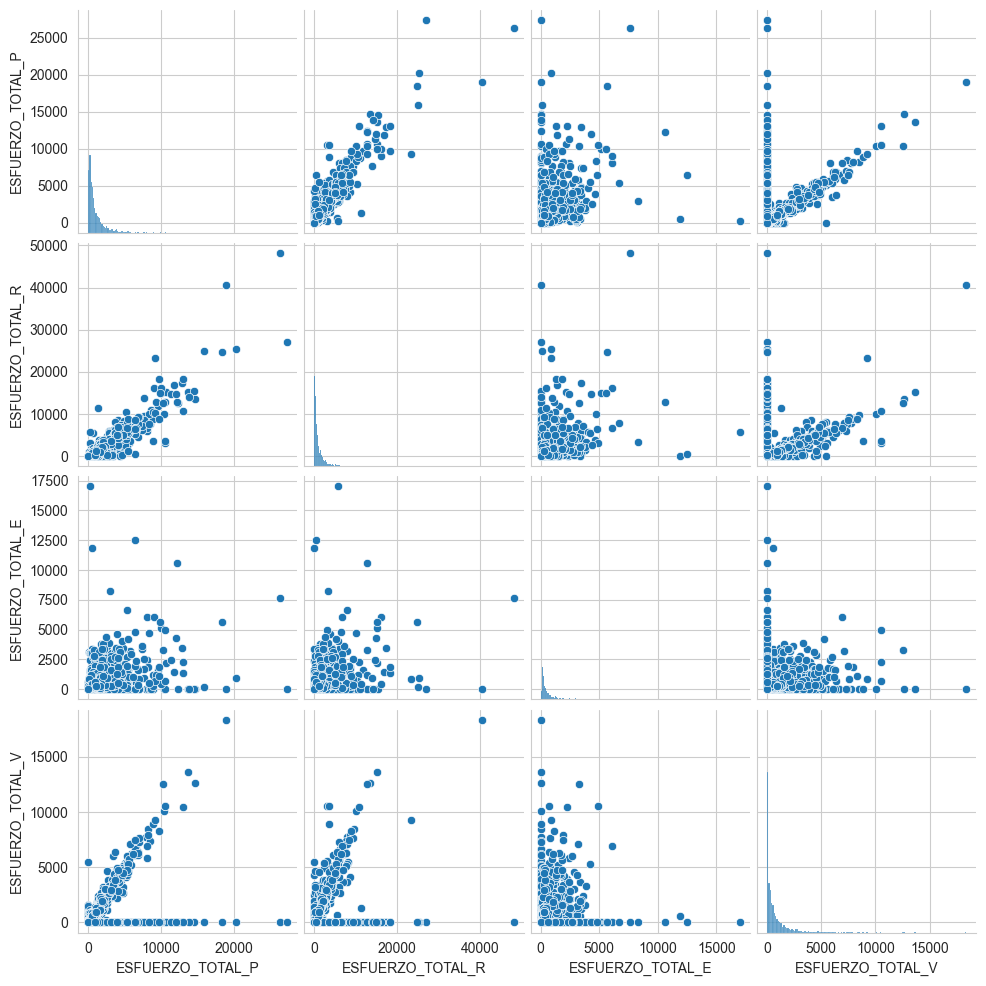

In [168]:
import seaborn as sns

sns.pairplot(proyectos_esfuerzos[ ["ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R", "ESFUERZO_TOTAL_E", "ESFUERZO_TOTAL_V"] ])

In [169]:
print("Correlación entre el Esfuerzo Total: P vs R")

proyectos_esfuerzos["ESFUERZO_TOTAL_P"].corr(proyectos_esfuerzos["ESFUERZO_TOTAL_R"])

Correlación entre el Esfuerzo Total: P vs R


0.9254529460380794

In [170]:
print("Correlación entre el Esfuerzo Total: P vs E")

proyectos_esfuerzos["ESFUERZO_TOTAL_P"].corr(proyectos_esfuerzos["ESFUERZO_TOTAL_E"])

Correlación entre el Esfuerzo Total: P vs E


0.3801426985221872

In [171]:
print("Correlación entre el Esfuerzo Total: P vs V")

proyectos_esfuerzos["ESFUERZO_TOTAL_P"].corr(proyectos_esfuerzos["ESFUERZO_TOTAL_V"])

Correlación entre el Esfuerzo Total: P vs V


0.5346078138851053

In [172]:
print("Porcentaje donde Esfuerzo Total P > V")

(proyectos_esfuerzos["ESFUERZO_TOTAL_P"] > proyectos_esfuerzos["ESFUERZO_TOTAL_V"]).mean() * 100

Porcentaje donde Esfuerzo Total P > V


75.70219966159051

<Axes: xlabel='ESFUERZO_TOTAL_V', ylabel='Count'>

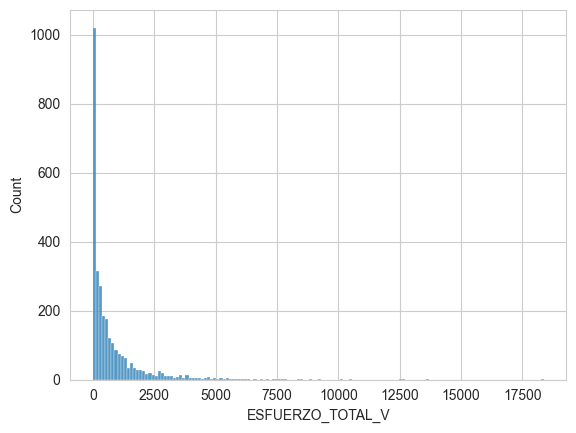

In [173]:
sns.histplot(proyectos_esfuerzos["ESFUERZO_TOTAL_V"])

In [174]:
import numpy as np

low_esfuerzo_total_v = np.percentile(proyectos_esfuerzos["ESFUERZO_TOTAL_V"], 27)

low_esfuerzo_total_v

0.0

<Axes: xlabel='ESFUERZO_TOTAL_V', ylabel='Count'>

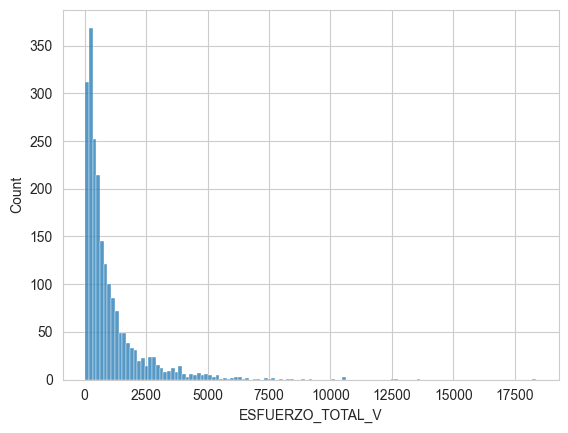

In [175]:
segmento = proyectos_esfuerzos[ (proyectos_esfuerzos["ESFUERZO_TOTAL_V"] > low_esfuerzo_total_v) ]

sns.histplot(segmento["ESFUERZO_TOTAL_V"])

In [176]:
print("Correlación entre el Esfuerzo Total: P vs V (SEGMENTO)")

segmento["ESFUERZO_TOTAL_P"].corr(segmento["ESFUERZO_TOTAL_V"])

Correlación entre el Esfuerzo Total: P vs V (SEGMENTO)


0.9772063801538371

Se descartarán los Esfuerzos Totales E y V

* NOTA: A modo general, para no segmentar los datos aún, podemos descartar en un modo generalizado (sin ningún estudio previo), los ejes E y V para análisis generales.

In [177]:
esfuerzos_mask = ["ID_PROYECTO", "ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R"]

proyectos_esfuerzos = proyectos_esfuerzos[ esfuerzos_mask ]

proyectos_esfuerzos.sample(5)

,ID_PROYECTO,ESFUERZO_TOTAL_P,ESFUERZO_TOTAL_R
1529,1530,345.0,208.25
819,820,892.5,1011.25
2831,2832,1950.5,1910.26
1177,1178,1200.5,1181.57
1971,1972,3368.0,3704.24


In [178]:
# Hipótesis: El esfuerzo total P, es siempre mayor al esfuerzo total R, bajo una constante: P = m * R + b

<Axes: xlabel='ESFUERZO_TOTAL_R', ylabel='ESFUERZO_TOTAL_P'>

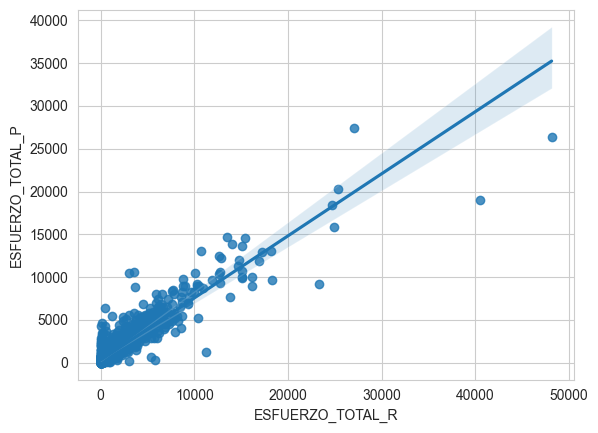

In [179]:
sns.regplot(x=proyectos_esfuerzos["ESFUERZO_TOTAL_R"], y=proyectos_esfuerzos["ESFUERZO_TOTAL_P"])

In [180]:
proyectos_esfuerzos["DIFF_P_R"] = proyectos_esfuerzos["ESFUERZO_TOTAL_P"] - proyectos_esfuerzos["ESFUERZO_TOTAL_R"]

proyectos_esfuerzos["P_HIGHER_R"] = proyectos_esfuerzos["ESFUERZO_TOTAL_P"] > proyectos_esfuerzos["ESFUERZO_TOTAL_R"]

proyectos_esfuerzos["ABS_DIFF_P_R"] = proyectos_esfuerzos["DIFF_P_R"].map(abs)

# 2 * Xd / (X1 + X2) -> Xd / Xp -> Adimensional
proyectos_esfuerzos["P_R_RATIO"] = 2 * proyectos_esfuerzos["ABS_DIFF_P_R"] / (proyectos_esfuerzos["ESFUERZO_TOTAL_P"] + proyectos_esfuerzos["ESFUERZO_TOTAL_R"])

proyectos_esfuerzos.sample(10)

,ID_PROYECTO,ESFUERZO_TOTAL_P,ESFUERZO_TOTAL_R,DIFF_P_R,P_HIGHER_R,ABS_DIFF_P_R,P_R_RATIO
2841,2842,705.0,661.61,43.39,True,43.39,0.063500
1829,1830,1510.5,1980.22,-469.72,False,469.72,0.269125
2000,2001,298.5,289.98,8.52,True,8.52,0.028956
448,449,641.5,904.76,-263.26,False,263.26,0.340512
394,395,681.0,680.33,0.67,True,0.67,0.000984
50,51,248.5,177.67,70.83,True,70.83,0.332403
465,466,0.0,0.00,0.00,False,0.00,NaN
2679,2680,1471.5,1007.13,464.37,True,464.37,0.374699
1264,1265,356.5,310.13,46.37,True,46.37,0.139118
1645,1646,2043.0,1916.37,126.63,True,126.63,0.063965


In [181]:
proyectos_esfuerzos.sample(10)

,ID_PROYECTO,ESFUERZO_TOTAL_P,ESFUERZO_TOTAL_R,DIFF_P_R,P_HIGHER_R,ABS_DIFF_P_R,P_R_RATIO
595,596,367.5,316.75,50.75,True,50.75,0.148338
211,212,104.0,67.95,36.05,True,36.05,0.419308
2593,2594,2217.0,2457.70,-240.70,False,240.70,0.102980
1684,1685,1467.5,1919.69,-452.19,False,452.19,0.267000
594,595,196.0,163.46,32.54,True,32.54,0.181049
2614,2615,1768.0,875.33,892.67,True,892.67,0.675413
2042,2043,784.5,1131.67,-347.17,False,347.17,0.362358
124,125,846.0,532.96,313.04,True,313.04,0.454023
286,287,2477.0,2573.95,-96.95,False,96.95,0.038389
524,525,213.5,211.71,1.79,True,1.79,0.008419


In [182]:
proyectos_esfuerzos["P_HIGHER_R"].mean() * 100

58.51099830795262

In [183]:
proyectos_esfuerzos.describe()

,ID_PROYECTO,ESFUERZO_TOTAL_P,ESFUERZO_TOTAL_R,DIFF_P_R,ABS_DIFF_P_R,P_R_RATIO
count,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2886.000000
mean,1478.000000,1251.967462,1282.559263,-30.591801,322.860301,0.320148
std,853.179348,1899.602525,2424.241745,980.733884,926.553326,0.421332
min,1.000000,0.000000,0.000000,-21759.080000,0.000000,0.000000
25%,739.500000,275.000000,220.170000,-73.895000,37.445000,0.075726
50%,1478.000000,638.500000,586.470000,23.640000,100.610000,0.176486
75%,2216.500000,1465.250000,1407.280000,116.760000,269.100000,0.370515
max,2955.000000,27413.500000,48150.580000,7440.090000,21759.080000,2.000000


In [184]:
print("Esfuerzo P umbral al 5% y 95% de los datos")

low_esfuerzo_p = proyectos_esfuerzos["ESFUERZO_TOTAL_P"].quantile(0.05)
high_esfuerzo_p = proyectos_esfuerzos["ESFUERZO_TOTAL_P"].quantile(0.95)

low_esfuerzo_p, high_esfuerzo_p

Esfuerzo P umbral al 5% y 95% de los datos


(92.35000000000001, 4340.849999999998)

In [185]:
print("Esfuerzo R umbral al 5% y 95% de los datos")

low_esfuerzo_r = proyectos_esfuerzos["ESFUERZO_TOTAL_R"].quantile(0.05)
high_esfuerzo_r = proyectos_esfuerzos["ESFUERZO_TOTAL_R"].quantile(0.95)

low_esfuerzo_r, high_esfuerzo_r

Esfuerzo R umbral al 5% y 95% de los datos


(1.7380000000000007, 4712.821999999998)

<Axes: >

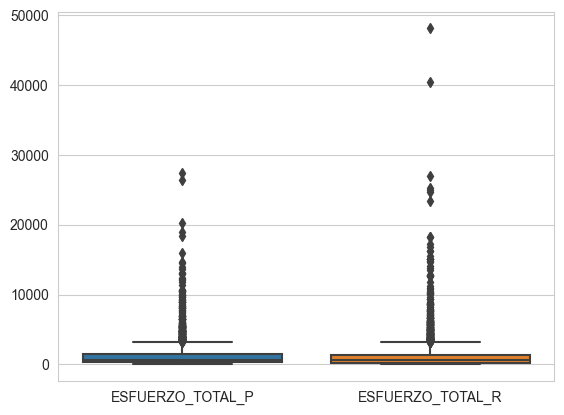

In [186]:
sns.boxplot(proyectos_esfuerzos[ ["ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R"] ])

<Axes: >

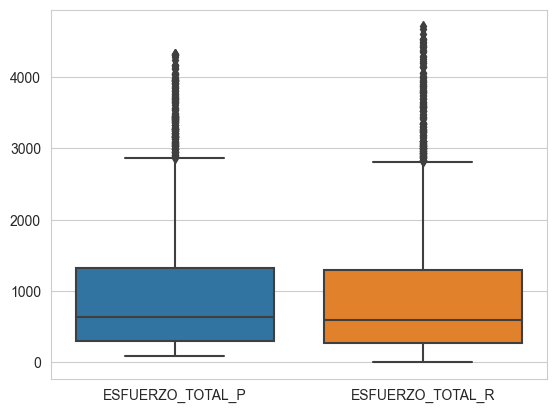

In [187]:
import seaborn as sns

view = proyectos_esfuerzos[ \
    (proyectos_esfuerzos["ESFUERZO_TOTAL_P"] >= low_esfuerzo_p) & \
    (proyectos_esfuerzos["ESFUERZO_TOTAL_P"] <= high_esfuerzo_p) & \
    (proyectos_esfuerzos["ESFUERZO_TOTAL_R"] >= low_esfuerzo_r) & \
    (proyectos_esfuerzos["ESFUERZO_TOTAL_R"] <= high_esfuerzo_r) \
][ ["ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R"] ]

sns.boxplot(view)

In [188]:
print("Porcentaje Proyectos con Esfuerzo Total R mayor a 4712")

proyectos_esfuerzos[ (proyectos_esfuerzos["ESFUERZO_TOTAL_R"] > high_esfuerzo_r) ].count().values[0] / proyectos_esfuerzos.count().values[0] * 100

Porcentaje Proyectos con Esfuerzo Total R mayor a 4712


5.008460236886632

In [189]:
print("Valores umbral al 5% y 95% de P R RATIO")

low_p_r_ratio = proyectos_esfuerzos["P_R_RATIO"].quantile(0.05)
high_p_r_ratio = proyectos_esfuerzos["P_R_RATIO"].quantile(0.95)

low_p_r_ratio, high_p_r_ratio

Valores umbral al 5% y 95% de P R RATIO


(0.013428521828857218, 1.2992414369215313)

In [190]:
print("Porcentaje Proyectos con Ratio de Esfuerzo Total P R mayor a 1")

proyectos_esfuerzos[ (proyectos_esfuerzos["P_R_RATIO"] > high_p_r_ratio) ].count().values[0] / proyectos_esfuerzos.count().values[0] * 100

Porcentaje Proyectos con Ratio de Esfuerzo Total P R mayor a 1


4.906937394247039

<Axes: xlabel='P_R_RATIO', ylabel='Count'>

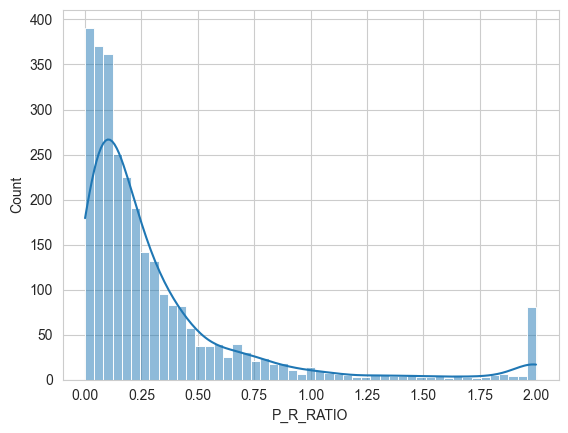

In [191]:
sns.histplot(proyectos_esfuerzos["P_R_RATIO"], kde=True)

<Axes: ylabel='Count'>

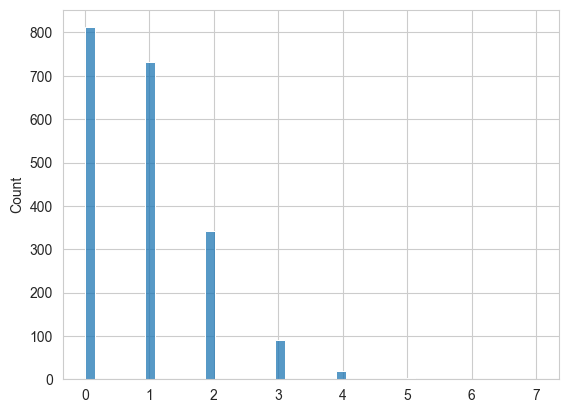

In [192]:
x = np.random.poisson(0.9, 2000)

sns.histplot(x)

Solo se considerará `P_R_RATIO` para integrarlo al análisis de esfuerzos

In [193]:
esfuerzos = proyectos_esfuerzos[ ["ID_PROYECTO", "P_R_RATIO"] ].copy()

esfuerzos.columns = ["ID_PROYECTO", "ESFUERZO_RATIO"]

esfuerzos.head()

,ID_PROYECTO,ESFUERZO_RATIO
0,1,0.183125
1,2,0.123066
2,3,0.373231
3,4,0.058380
4,5,0.677898


## 2. Reducción de fechas

In [194]:
proyectos[ ["ID_PROYECTO", "FECHA_MEDICION", "CREACION"] ].sample(10)

,ID_PROYECTO,FECHA_MEDICION,CREACION
1001,1002,2018-11-09 00:00:00,2018-10-24
2229,2230,2020-10-08 00:00:00,2020-09-08
483,484,NaT,NaT
2631,2632,2017-12-13 00:00:00,2017-09-15
2686,2687,2020-12-09 14:00:00,2020-10-12
1702,1703,2021-02-26 00:00:00,2020-12-22
672,673,2018-02-07 00:00:00,2017-12-13
2368,2369,2021-06-16 00:00:00,2020-06-25
1739,1740,2017-12-27 00:00:00,2017-12-15
2931,2932,2023-01-17 14:42:00,2022-11-18


In [195]:
print("Fecha de medición y creación del Proyecto 518")

fecha_medicion_518 = proyectos[ (proyectos["ID_PROYECTO"] == 518) ]["FECHA_MEDICION"].values[0]

fecha_creacion_518 = proyectos[ (proyectos["ID_PROYECTO"] == 518) ]["CREACION"].values[0]

fecha_medicion_518, fecha_creacion_518

Fecha de medición y creación del Proyecto 518


(numpy.datetime64('2017-08-15T00:00:00.000000000'),
 numpy.datetime64('2016-12-22T00:00:00.000000000'))

In [196]:
print("Diferencia entre la medición y la creación del Proyecto 518")

fecha_medicion_518 - fecha_creacion_518

Diferencia entre la medición y la creación del Proyecto 518


numpy.timedelta64(20390400000000000,'ns')

In [197]:
import numpy as np

print("Diferencia entre la medición y la creación en días del Proyecto 518")

np.timedelta64(fecha_medicion_518 - fecha_creacion_518, 'D')

Diferencia entre la medición y la creación en días del Proyecto 518


numpy.timedelta64(236,'D')

In [198]:
print("Diferencia entre la medición y la creación en días, como entero del Proyecto 518")

np.timedelta64(fecha_medicion_518 - fecha_creacion_518, 'D').astype(int)

Diferencia entre la medición y la creación en días, como entero del Proyecto 518


236

In [199]:
def convert_delta_days(delta):
    if str( delta ) == 'NaT':
        return -1
    return np.timedelta64(delta, 'D').astype(int)

proyectos["DIAS_MEDICION_CREACION"] = (proyectos["FECHA_MEDICION"] - proyectos["CREACION"]).map(convert_delta_days)

proyectos[ ["ID_PROYECTO", "CREACION", "FECHA_MEDICION", "DIAS_MEDICION_CREACION"] ].sample(10)

,ID_PROYECTO,CREACION,FECHA_MEDICION,DIAS_MEDICION_CREACION
1606,1607,2020-09-01,2020-09-25,24
2230,2231,2020-04-29,2020-09-07,131
2345,2346,2020-03-20,2021-04-13,389
1148,1149,2019-04-09,2019-04-16,7
193,194,2015-07-24,NaT,-1
1051,1052,2018-05-07,2018-08-23,108
102,103,2015-04-10,NaT,-1
330,331,2012-06-15,NaT,-1
627,628,2018-01-16,2018-02-14,29
176,177,2016-06-07,NaT,-1


Calcularemos todas las diferencias en días de las fechas, respecto a la fecha menor

In [200]:
# deltas = ["CREACION", "FECHA_MEDICION", "POR_AUTORIZAR_INICIATIVA_PRIMERA", "POR_AUTORIZAR_INICIATIVA_ULTIMA", "POR_AUTORIZAR_EVALUADOR_PROYECTOS_PRIMERA", "POR_AUTORIZAR_EVALUADOR_PROYECTOS_ULTIMA", "POR_AUTORIZAR_GERENTE_PROYECTOS_PRIMERA", "POR_AUTORIZAR_GERENTE_PROYECTOS_ULTIMA", "AUTORIZADA_EN_ESPERA_PRIORIDAD_PRIMERA", "AUTORIZADA_EN_ESPERA_PRIORIDAD_ULTIMA", "ANALISIS_PRIMERA", "ANALISIS_ULTIMA", "ESPERA_AUTORIZACION_CONTRATO_PRIMERA", "ESPERA_AUTORIZACION_CONTRATO_ULTIMA", "ESPERA_DE_FECHA_PROMESA_PRIMERA", "ESPERA_DE_FECHA_PROMESA_ULTIMA", "EN_DESARROLLO_PRIMERA", "EN_DESARROLLO_ULTIMA", "VALIDAR_ENTREGABLE_PRIMERA", "VALIDAR_ENTREGABLE_ULTIMA", "POR_INSTALAR", "FINALIZO", "DETENIDA"]
deltas = ["ANALISIS_PRIMERA", "ANALISIS_ULTIMA", "ESPERA_AUTORIZACION_CONTRATO_PRIMERA", "ESPERA_AUTORIZACION_CONTRATO_ULTIMA", "ESPERA_DE_FECHA_PROMESA_PRIMERA", "ESPERA_DE_FECHA_PROMESA_ULTIMA", "EN_DESARROLLO_PRIMERA", "EN_DESARROLLO_ULTIMA", "VALIDAR_ENTREGABLE_PRIMERA", "VALIDAR_ENTREGABLE_ULTIMA", "POR_INSTALAR"]

from collections import defaultdict

labels = defaultdict(int)

for index, proyecto in proyectos.iterrows():

    min_fecha = np.datetime64("3000-01-01")
    min_delta = "NONE"

    for delta in deltas:
        fecha = proyecto[delta]
        if fecha < min_fecha:
            min_fecha = fecha
            min_delta = delta

    labels[min_delta] += 1

    #print("{} - {} ({})".format(proyecto["ID_PROYECTO"], min_delta, min_fecha))

labels

defaultdict(int,
            {'ANALISIS_PRIMERA': 2837,
             'ESPERA_DE_FECHA_PROMESA_PRIMERA': 1,
             'NONE': 112,
             'VALIDAR_ENTREGABLE_ULTIMA': 5})

Hay pocas fechas que son menores a `CREACION`, por lo que podemos hacer que las demás fechas se comparen contra esta fecha

In [201]:
fechas = proyectos[ ["ID_PROYECTO", "CREACION"] ].copy()

for index, proyecto in proyectos.iterrows():

    fecha_creacion = proyecto["CREACION"]

    if str( fecha_creacion ) == 'NaT':
        min_fecha = np.datetime64("3000-01-01")
        min_delta = "NONE"

        for delta in deltas:
            fecha = proyecto[delta]
            if fecha < min_fecha:
                min_fecha = fecha
                min_delta = delta

        #print("{} - {} ({})".format(proyecto["ID_PROYECTO"], min_delta, min_fecha))

        fecha_creacion = min_fecha

        fechas.at[index, "CREACION"] = fecha_creacion

    #print(fecha_creacion)

    for delta_index, delta in enumerate(deltas):
        fecha_otra = proyecto[delta]

        #print(fecha_otra)

        if str( fecha_creacion ) == 'NaT':
            #fechas.at[index, "DELTA_CREACION"] = -1
            fechas.at[index, "DELTA_{}".format(delta_index)] = -1
        else:
            #fechas.at[index, "DELTA_CREACION"] = 0
            if str( fecha_otra ) == 'NaT':
                fechas.at[index, "DELTA_{}".format(delta_index)] = -1
            else:
                diff = np.timedelta64(fecha_otra - fecha_creacion, 'D').astype(int)
                #print(diff)
                fechas.at[index, "DELTA_{}".format(delta_index)] = diff

fechas.sample(10)

,ID_PROYECTO,CREACION,DELTA_0,DELTA_1,DELTA_2,DELTA_3,DELTA_4,DELTA_5,DELTA_6,DELTA_7,DELTA_8,DELTA_9,DELTA_10
373,374,2016-12-01 00:00:00,4.0,22.0,15.0,23.0,19.0,25.0,22.0,27.0,69.0,69.0,82.0
255,256,2016-04-04 00:00:00,7.0,7.0,11.0,11.0,11.0,11.0,15.0,15.0,35.0,35.0,50.0
1356,1357,2019-05-02 00:00:00,202.0,202.0,222.0,230.0,231.0,231.0,236.0,236.0,265.0,265.0,270.0
2284,2285,2021-01-22 00:00:00,12.0,12.0,17.0,17.0,21.0,21.0,25.0,25.0,41.0,41.0,45.0
63,64,2016-10-21 00:00:00,10.0,10.0,13.0,13.0,13.0,13.0,17.0,17.0,21.0,21.0,28.0
2002,2003,2018-12-17 00:00:00,95.0,154.0,108.0,154.0,143.0,162.0,149.0,164.0,333.0,333.0,340.0
2565,2566,2017-09-29 00:00:00,0.0,0.0,20.0,20.0,28.0,28.0,33.0,33.0,66.0,66.0,74.0
555,556,2017-08-30 00:00:00,2.0,2.0,9.0,9.0,14.0,14.0,15.0,15.0,29.0,29.0,30.0
1761,1762,2017-10-13 00:00:00,27.0,27.0,41.0,55.0,60.0,60.0,63.0,63.0,137.0,137.0,173.0
1798,1799,2017-08-14 00:00:00,255.0,255.0,275.0,275.0,277.0,277.0,289.0,289.0,290.0,290.0,305.0


In [202]:
np.sort(fechas["CREACION"].map(lambda date: date.year).unique())

AttributeError: 'numpy.datetime64' object has no attribute 'year'

In [203]:
test = pd.DataFrame(fechas["CREACION"].map(lambda date: date.year))
test["COUNT"] = 1
test.groupby("CREACION").count()

AttributeError: 'numpy.datetime64' object has no attribute 'year'

Hay 57 proyectos que potencialmente podríamos excluir del análisis por tener el año 1900 como año de creación, o en su lugar cambiar la fecha o considerar alguna marca sobre estas fechas

In [ ]:
fechas["INVALID_FECHA"] = fechas["CREACION"].map(lambda date: date.year) == 1900

fechas.sample(10)

Usaremos de `DELTA_1` a `DELTA_22` y `INVALID_FECHA` como ejes de análisis

In [204]:
["ID_PROYECTO"] + [ "DELTA_{}".format(i) for i in range(1, len(deltas)) ]

['ID_PROYECTO',
 'DELTA_1',
 'DELTA_2',
 'DELTA_3',
 'DELTA_4',
 'DELTA_5',
 'DELTA_6',
 'DELTA_7',
 'DELTA_8',
 'DELTA_9',
 'DELTA_10']

In [205]:
fechas = fechas[ ["ID_PROYECTO"] + [ "DELTA_{}".format(i) for i in range(1, len(deltas)) ] ]

fechas.head()

,ID_PROYECTO,DELTA_1,DELTA_2,DELTA_3,DELTA_4,DELTA_5,DELTA_6,DELTA_7,DELTA_8,DELTA_9,DELTA_10
0,1,825.0,833.0,833.0,837.0,837.0,839.0,839.0,852.0,852.0,879.0
1,2,584.0,591.0,591.0,594.0,594.0,596.0,596.0,598.0,598.0,608.0
2,3,461.0,463.0,463.0,481.0,481.0,484.0,484.0,492.0,492.0,518.0
3,4,455.0,464.0,464.0,465.0,465.0,469.0,469.0,476.0,476.0,492.0
4,5,520.0,525.0,525.0,527.0,527.0,529.0,529.0,556.0,556.0,557.0


De las deltas solo consideraremos los cuartiles `0.25`, `0.5`, `0.75` y `1`

In [209]:
for index, row in fechas.iterrows():
    #print(row.values[1:])
    values = list(map(lambda val: val if val >= 0 else 0, row.values[1:]))
    q_0 = np.quantile(values, 0.0)
    q_25 = np.quantile(values, 0.25)
    q_50 = np.quantile(values, 0.5)
    q_75 = np.quantile(values, 0.75)
    q_100 = np.quantile(values, 1)
    #print([q_25, q_50, q_75, q_100])
    fechas.loc[index, "q_0"] = q_0 - q_0
    fechas.loc[index, "q_25"] = q_25 - q_0
    fechas.loc[index, "q_50"] = q_50 - q_0
    fechas.loc[index, "q_75"] = q_75 - q_0
    fechas.loc[index, "q_100"] = q_100 - q_0

fechas = fechas[ ["ID_PROYECTO", "q_0", "q_25", "q_50", "q_75", "q_100"] ]

fechas.columns = ["ID_PROYECTO", "DELTA_FECHA_0", "DELTA_FECHA_25", "DELTA_FECHA_50", "DELTA_FECHA_75", "DELTA_FECHA_100"]

fechas.head(10)

,ID_PROYECTO,DELTA_FECHA_0,DELTA_FECHA_25,DELTA_FECHA_50,DELTA_FECHA_75,DELTA_FECHA_100
0,1,0.0,4.781250,12.84375,24.984375,42.0000
1,2,0.0,1.546875,4.00000,7.906250,13.8125
2,3,0.0,5.625000,12.87500,23.500000,39.2500
3,4,0.0,3.234375,8.34375,15.703125,25.6875
4,5,0.0,8.437500,17.53125,25.265625,29.6250
5,6,0.0,9.140625,20.34375,32.203125,43.3125
6,7,0.0,20.718750,45.46875,69.921875,89.7500
7,8,0.0,20.671875,52.18750,94.062500,145.8125
8,9,0.0,28.968750,67.59375,111.609375,156.7500
9,10,0.0,0.000000,18.87500,66.062500,151.0000


In [243]:
#fechas["FECHA_ALFA"] = fechas["DELTA_FECHA_25"] / fechas["DELTA_FECHA_100"]
#fechas["FECHA_BETA"] = fechas["DELTA_FECHA_50"] / fechas["DELTA_FECHA_100"]

fechas["FECHA_ALFA"] = fechas["DELTA_FECHA_100"]
fechas["FECHA_BETA"] = fechas["DELTA_FECHA_100"] - fechas["DELTA_FECHA_50"]

fechas = fechas.fillna(1)

fechas.head(10)

,ID_PROYECTO,DELTA_FECHA_0,DELTA_FECHA_25,DELTA_FECHA_50,DELTA_FECHA_75,DELTA_FECHA_100,FECHA_ALFA,FECHA_BETA
0,1,0.0,4.781250,12.84375,24.984375,42.0000,42.0000,29.15625
1,2,0.0,1.546875,4.00000,7.906250,13.8125,13.8125,9.81250
2,3,0.0,5.625000,12.87500,23.500000,39.2500,39.2500,26.37500
3,4,0.0,3.234375,8.34375,15.703125,25.6875,25.6875,17.34375
4,5,0.0,8.437500,17.53125,25.265625,29.6250,29.6250,12.09375
5,6,0.0,9.140625,20.34375,32.203125,43.3125,43.3125,22.96875
6,7,0.0,20.718750,45.46875,69.921875,89.7500,89.7500,44.28125
7,8,0.0,20.671875,52.18750,94.062500,145.8125,145.8125,93.62500
8,9,0.0,28.968750,67.59375,111.609375,156.7500,156.7500,89.15625
9,10,0.0,0.000000,18.87500,66.062500,151.0000,151.0000,132.12500


## 3. Mezclamos los análisis

In [246]:
#pd.merge(proyectos, pd.merge(esfuerzos, fechas, on="ID_PROYECTO", how="inner"), on="ID_PROYECTO", how="inner")
dataset = pd.merge(esfuerzos.fillna(0), fechas, on="ID_PROYECTO", how="inner")

dataset["CFP"] = proyectos["CFP"]
dataset["EFICIENCIA"] = proyectos["EFICIENCIA"].fillna(0)

dataset.head(10)

,ID_PROYECTO,ESFUERZO_RATIO,DELTA_FECHA_0,DELTA_FECHA_25,DELTA_FECHA_50,DELTA_FECHA_75,DELTA_FECHA_100,FECHA_ALFA,FECHA_BETA,CFP,EFICIENCIA
0,1,0.183125,0.0,4.781250,12.84375,24.984375,42.0000,42.0000,29.15625,12,0.0
1,2,0.123066,0.0,1.546875,4.00000,7.906250,13.8125,13.8125,9.81250,2,0.0
2,3,0.373231,0.0,5.625000,12.87500,23.500000,39.2500,39.2500,26.37500,11,0.0
3,4,0.058380,0.0,3.234375,8.34375,15.703125,25.6875,25.6875,17.34375,11,0.0
4,5,0.677898,0.0,8.437500,17.53125,25.265625,29.6250,29.6250,12.09375,4,0.0
5,6,0.164013,0.0,9.140625,20.34375,32.203125,43.3125,43.3125,22.96875,13,0.0
6,7,0.068988,0.0,20.718750,45.46875,69.921875,89.7500,89.7500,44.28125,18,0.0
7,8,0.407959,0.0,20.671875,52.18750,94.062500,145.8125,145.8125,93.62500,167,0.0
8,9,0.226785,0.0,28.968750,67.59375,111.609375,156.7500,156.7500,89.15625,2,0.0
9,10,0.198861,0.0,0.000000,18.87500,66.062500,151.0000,151.0000,132.12500,79,0.0


In [247]:
X = dataset[ ["FECHA_ALFA", "FECHA_BETA", "CFP"] ].values

y = dataset["ESFUERZO_RATIO"].values
#y = dataset["EFICIENCIA"].values

X.shape, y.shape

((2955, 3), (2955,))

In [248]:
from sklearn.svm import SVR

clf = SVR()

clf.fit(X, y)

clf.predict([
    [0.5, 0.7, 12],
    [0.6, 0.8, 12],
    [0.3, 0.9, 12],
    [0.5, 0.7, 32],
    [0.6, 0.8, 32],
    [0.3, 0.9, 32],
])

array([0.31069556, 0.31034146, 0.31130144, 0.32370108, 0.32333033,
       0.32429101])

In [249]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVR(), X, y).mean()

-0.06771021017466808

In [250]:
y

array([0.18312485, 0.12306585, 0.3732307 , ..., 0.        , 1.08790491,
       0.04171912])

In [251]:
def esfuerzo_ratio_class(ratio):
    if ratio < 0.2:
        return 0
        #return 1
    #if ratio < 0.5:
    #    return 2
    #if ratio < 0.8:
    #    return 3
    #if ratio < 1.3:
    #    return 4
    return 1

dataset["ESFUERZO_RATIO_CAT"] = dataset["ESFUERZO_RATIO"].map(esfuerzo_ratio_class)

dataset.head(10)

,ID_PROYECTO,ESFUERZO_RATIO,DELTA_FECHA_0,DELTA_FECHA_25,DELTA_FECHA_50,DELTA_FECHA_75,DELTA_FECHA_100,FECHA_ALFA,FECHA_BETA,CFP,EFICIENCIA,ESFUERZO_RATIO_CAT
0,1,0.183125,0.0,4.781250,12.84375,24.984375,42.0000,42.0000,29.15625,12,0.0,0
1,2,0.123066,0.0,1.546875,4.00000,7.906250,13.8125,13.8125,9.81250,2,0.0,0
2,3,0.373231,0.0,5.625000,12.87500,23.500000,39.2500,39.2500,26.37500,11,0.0,1
3,4,0.058380,0.0,3.234375,8.34375,15.703125,25.6875,25.6875,17.34375,11,0.0,0
4,5,0.677898,0.0,8.437500,17.53125,25.265625,29.6250,29.6250,12.09375,4,0.0,1
5,6,0.164013,0.0,9.140625,20.34375,32.203125,43.3125,43.3125,22.96875,13,0.0,0
6,7,0.068988,0.0,20.718750,45.46875,69.921875,89.7500,89.7500,44.28125,18,0.0,0
7,8,0.407959,0.0,20.671875,52.18750,94.062500,145.8125,145.8125,93.62500,167,0.0,1
8,9,0.226785,0.0,28.968750,67.59375,111.609375,156.7500,156.7500,89.15625,2,0.0,1
9,10,0.198861,0.0,0.000000,18.87500,66.062500,151.0000,151.0000,132.12500,79,0.0,0


In [252]:
y_class = dataset["ESFUERZO_RATIO_CAT"].values

y_class

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [253]:
from sklearn.neural_network import MLPClassifier

X = dataset[ ["FECHA_ALFA", "FECHA_BETA", "CFP"] ].values

cross_val_score(MLPClassifier(), X, y_class).mean() * 100

60.372250423011856

In [254]:
dataset["PDR"] = proyectos["PDR"].fillna(0)

X = dataset[ ["FECHA_ALFA", "FECHA_BETA", "CFP", "PDR"] ].values

X

array([[ 42.        ,  29.15625   ,  12.        ,  33.70833333],
       [ 13.8125    ,   9.8125    ,   2.        , 147.5       ],
       [ 39.25      ,  26.375     ,  11.        ,  51.37545455],
       ...,
       [ 17.25      ,  10.875     ,   3.        ,   0.        ],
       [168.9375    , 126.46875   ,  42.        ,   0.        ],
       [110.        ,  72.53125   ,  13.        ,  73.07461538]])

In [255]:
cross_val_score(MLPClassifier(), X, y_class).mean() * 100

56.14213197969542

In [266]:
X = dataset[ ["FECHA_ALFA", "FECHA_BETA", "CFP", "PDR"] ].values

X

array([[ 42.        ,  29.15625   ,  12.        ,  33.70833333],
       [ 13.8125    ,   9.8125    ,   2.        , 147.5       ],
       [ 39.25      ,  26.375     ,  11.        ,  51.37545455],
       ...,
       [ 17.25      ,  10.875     ,   3.        ,   0.        ],
       [168.9375    , 126.46875   ,  42.        ,   0.        ],
       [110.        ,  72.53125   ,  13.        ,  73.07461538]])

In [275]:
cross_val_score(MLPClassifier(), X, y_class).mean() * 100

57.69881556683587

El dataset ha sido trabajo en general sin éxito generalizado, entonces comenzamos con análisis específicos (segmentar)

In [276]:
proyectos["METODOLOGIA"].sample(10)

1271    Cascada
2470    Cascada
1174    Cascada
2197    Cascada
1467    Cascada
1551    Cascada
960     Cascada
1549       Ágil
293     Cascada
2025    Cascada
Name: METODOLOGIA, dtype: object

In [226]:
proyectos["METODOLOGIA"].unique()

array(['Cascada', 'Ágil', 'ágil', nan], dtype=object)

In [227]:
proyectos["METODOLOGIA"].map(lambda metod: str(metod).upper()).unique()

array(['CASCADA', 'ÁGIL', 'NAN'], dtype=object)

In [228]:
contador = proyectos[ ["METODOLOGIA"] ].copy()

contador["METODOLOGIA"] = contador["METODOLOGIA"].map(lambda metod: str(metod).upper())

contador["COUNT"] = 0

contador.groupby("METODOLOGIA").count()

,COUNT
METODOLOGIA,
CASCADA,2727
NAN,4
ÁGIL,224


In [278]:
dataset["METODOLOGIA"] = proyectos["METODOLOGIA"].map(lambda metod: str(metod).upper())

dataset_agil = dataset[ (dataset["METODOLOGIA"] == "ÁGIL") ].copy()

dataset_agil.head(10)

,ID_PROYECTO,ESFUERZO_RATIO,DELTA_FECHA_0,DELTA_FECHA_25,DELTA_FECHA_50,DELTA_FECHA_75,DELTA_FECHA_100,FECHA_ALFA,FECHA_BETA,CFP,EFICIENCIA,ESFUERZO_RATIO_CAT,PDR,METODOLOGIA
605,606,0.018647,0.0,2.531250,7.12500,14.625000,25.8750,25.8750,18.75000,2,0.000000,0,88.000000,ÁGIL
618,619,0.636610,0.0,0.843750,4.53125,12.203125,25.0000,25.0000,20.46875,30,0.000000,1,15.733333,ÁGIL
639,640,0.423969,0.0,6.046875,23.87500,59.656250,119.5625,119.5625,95.68750,22,0.000000,1,20.304545,ÁGIL
654,655,0.534512,0.0,2.250000,8.40625,19.765625,37.6250,37.6250,29.21875,8,0.000000,1,32.937500,ÁGIL
808,809,1.999514,0.0,1.968750,10.40625,28.265625,58.5000,58.5000,48.09375,12,0.000000,1,34.291667,ÁGIL
929,930,0.200201,0.0,7.593750,11.00000,12.062500,12.6250,12.6250,1.62500,123,0.612121,1,25.679024,ÁGIL
939,940,0.160659,0.0,11.718750,22.87500,31.062500,33.8750,33.8750,11.00000,223,0.000000,0,37.909417,ÁGIL
952,953,0.419916,0.0,5.484375,13.18750,22.812500,34.0625,34.0625,20.87500,48,0.000000,1,24.782708,ÁGIL
969,970,2.000000,0.0,0.703125,8.81250,28.500000,63.9375,63.9375,55.12500,5,0.551724,1,67.800000,ÁGIL
995,996,1.128865,0.0,1.687500,8.12500,21.312500,43.2500,43.2500,35.12500,16,1.400000,1,3.875625,ÁGIL


In [286]:
X = dataset_agil[ ["DELTA_FECHA_50", "DELTA_FECHA_100", "CFP", "PDR"] ].values
y_class = dataset_agil["ESFUERZO_RATIO_CAT"].values

print("La presición con la que una red neuronal podría etiquetar correctamente el ratio de esfuerzo de un proyecto que use metodología ágil, a partir de sus fechas asociadas (creación, modificación, finalizó, etc) tomando los quantiles 50 y 100, el CFP y PDR")

cross_val_score(MLPClassifier(), X, y_class).mean() * 100

La presición con la que una red neuronal podría etiquetar correctamente el ratio de esfuerzo de un proyecto que use metodología ágil, a partir de sus fechas asociadas (creación, modificación, finalizó, etc) tomando los quantiles 50 y 100, el CFP y PDR


D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural

73.20202020202021

¿Qué significa que en general un clasificador solo tenga el 55% de exactitud al determinar el esfuerzo de un proyecto basado en sus fechas, versus el 75% de exactitud cuando se usa metodología ágil?

Significa que cuándo un proyecto usa metodología ágil, la razón entre el esfuerzo total planeado y el esfuerzo real total es más estable, es decir, puede ser más predictible. Esto significa que la metodología ágil el esfuerzo total de los proyectos (planeado versus real) es más predictible, es decir, podemos tener mayor predicción al momento de establecer las fechas para saber si un proyecto tendrá una alta o baja complejidad (mayor o menor al 0.2 de ratio) con una confianza del 75%.

In [239]:
clf = MLPClassifier()

In [290]:
clf.fit(X, y_class)

clf.predict([
    [14, 40, 2, 90],
    [13, 43, 2, 88],
    [32, 96, 12, 34],
    [200, 232, 223, 37.9],
])

array([0.90318247, 0.90298933, 0.90139004, 0.52640995])

In [288]:
clf.fit(X, y_class)

clf.predict([
    [14, 40, 2, 90],
    [13, 43, 2, 88],
    [32, 96, 12, 34],
    [200, 232, 223, 37.9],
])

array([0.90318247, 0.90298933, 0.90139004, 0.52640995])

In [289]:
clf.fit(X, y_class)

clf.predict([
    [14, 40, 2, 90],
    [13, 43, 2, 88],
    [32, 96, 12, 34],
    [200, 232, 223, 37.9],
])

array([0.90318247, 0.90298933, 0.90139004, 0.52640995])